### Data types
1. **Quantitative**
    - Continuous (can be expressed as float, e.g. height, weight, time)
    - Discrete (can be expressed as integer, e.g. kids in household, number of wives)
    
2. **Categorical (Qualitative)**
    - Ordinal (it's a ranking, e.g. high school grade, happiness scale 1-5)
    - Nominal (not a ranking, e.g. 1 for males, 2 for females)

### Quartiles
1. **1st Quartile**<br>
25% of the data falls below this number.
2. **2nd Quartile (= median)**<br>
50% of the data falls below this number.
3. **3rd Quartile**<br>
75% of the data falls below this number

### IQR (Inter-quartile range)
It is another measure of spread (which is max - min).<br>
It tells us where the most of the data falls.
It is calculated as Q3 - Q1.

### Standard deviation
Average distance that the data falls from the mean.

### Standard score (z-score)
For a bell-shaped distribution:
- 68% of the data falls within 1 std from the mean
- 95% of the data falls within 2 stds from the mean
- 99.7% of the data falls within 3 stds from the mean

If you sleep 10 hours a day, and the mean is 7 hours, and the std is, the z-score is:<br>
10 - 7 / 1.7 = 1.76<br><br>
If you sleep 6 hours a day, it is:<br>
6 - 7 / 1.7 = -0.59

### Effect of skew on median and mean
Positive skew:
![title](img/positive_skew.gif)
Negative skew:
![title](img/negative_skew.gif)

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import numpy as np
sns.set_style("darkgrid")

In [4]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


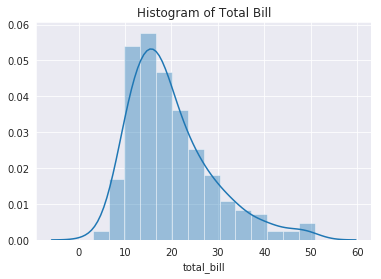

In [6]:
# Histogram

sns.distplot(df.total_bill).set(title="Histogram of Total Bill",
                               );

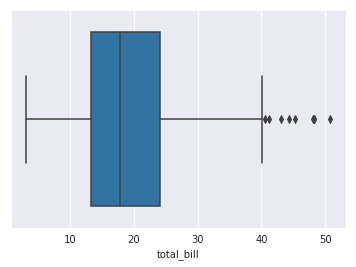

In [7]:
# Box Plot

sns.boxplot(df.total_bill);

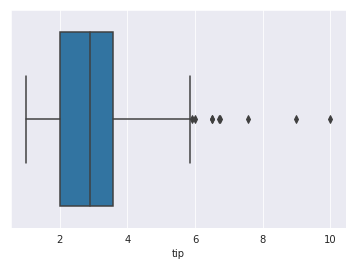

In [8]:
sns.boxplot(df.tip);

Two datasets might have the same median mean and mode, but they can be spread out very differently.<br>
Box plots let you see how spread out the data is. You can see that Powder Valley has more consitent snowfalls, whereas Mad Mountain is unpredictable.

![title](img/box_plot.png)


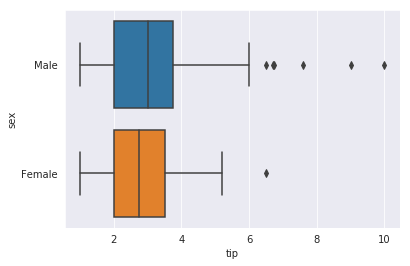

In [9]:
sns.boxplot(x=df.tip, y=df.sex);

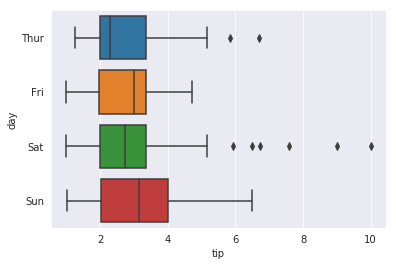

In [10]:
sns.boxplot(x=df.tip, y=df.day);

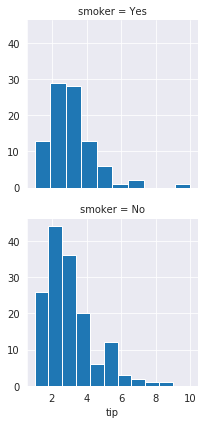

In [11]:
# Compare two histograms by categorical data

g = sns.FacetGrid(df, row="smoker")
g.map(plt.hist, "tip");

# this works too
#g.map(sns.distplot, "tip")

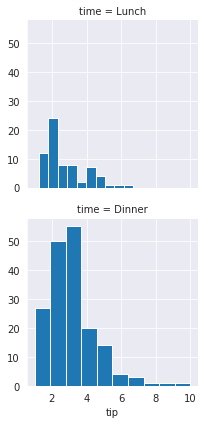

In [12]:
g = sns.FacetGrid(df, row="time")
g.map(plt.hist, "tip");

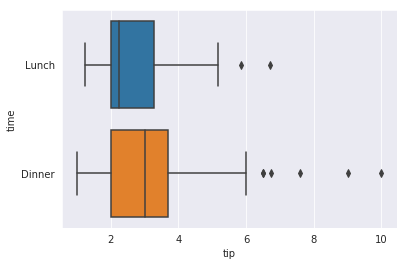

In [36]:
sns.boxplot(x=df.tip, y=df.time);

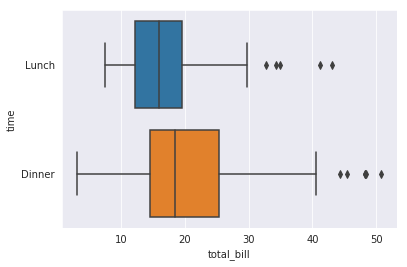

In [39]:
sns.boxplot(x=df.total_bill, y=df.time);

# Lunch always costs roughly the same, while dinners vary greatly.

### Linearity and Correlation

![title](img/association_strength.png)
![title](img/correlation.png)

### Cartwheel data

In [19]:
df = pd.read_csv("cartwheel.csv")
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


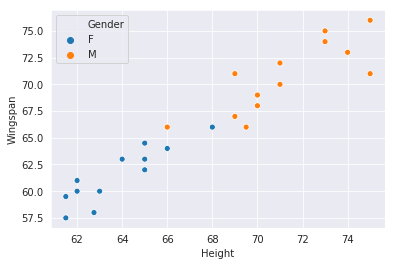

In [25]:
sns.scatterplot(df.Height, df.Wingspan, hue=df.Gender);

In [21]:
from scipy import stats as stats

In [23]:
stats.pearsonr(df.Wingspan, df.Height)[0]

0.9540180704953922

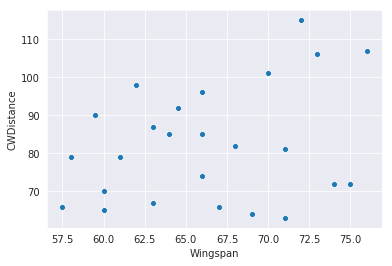

In [28]:
sns.scatterplot(df.Wingspan, df.CWDistance);
# Seemingly not linear data

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


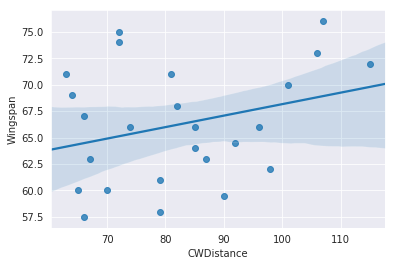

In [30]:
sns.regplot(x="CWDistance", y="Wingspan", data=df);

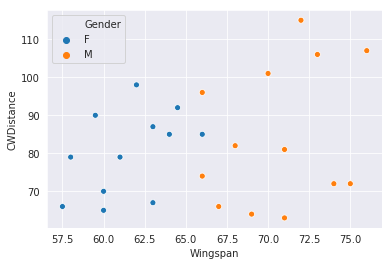

In [39]:
sns.scatterplot(df.Wingspan, df.CWDistance, hue=df.Gender );

In [40]:
print(stats.pearsonr(df.loc[df.Gender == "F", 'CWDistance'], df.loc[df.Gender == "F", 'Wingspan'])[0])
print(stats.pearsonr(df.loc[df.Gender == "M", 'CWDistance'], df.loc[df.Gender == "M", 'Wingspan'])[0])

# But more linear for females than for males

0.4581210007849479
0.27476207389072843


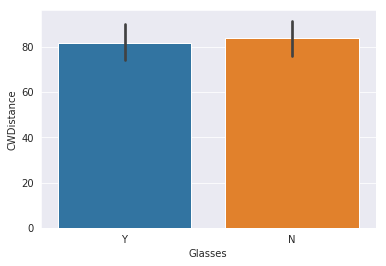

In [37]:
# Make a Seaborn barplot with x = glasses and y = cartwheel distance

sns.barplot(df.Glasses, df.CWDistance, );

### Side-by-side Barchart

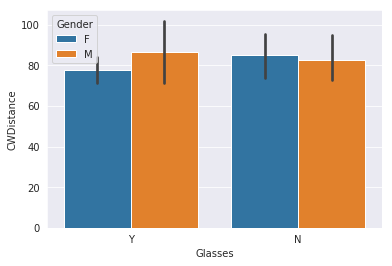

In [36]:
# Make the same Seaborn boxplot as above, but include gender for the hue argument

sns.barplot(df.Glasses, df.CWDistance, hue=df.Gender);

### Bitwise vs Boolean operators

Boolean operators short-circuit, meaning that if the first evaluation is True, and the operator is "or", the second part will not be evaluated at all.<br>Compare:

In [1]:
x = 5

if x or undefined_var:
    print("ok")

ok


In [2]:
x = 5

if x | undefined_var:
    print("ok")

NameError: name 'undefined_var' is not defined

In [5]:
x = []

if x and undefined_var:
    print("ok")

In [6]:
x = []

if x & undefined_var:
    print("ok")

NameError: name 'undefined_var' is not defined

##### Bitwise vs Boolean in practice

**and** and **or** come straight from boolean logic (and therefore operate on two booleans to produce a boolean), while & and | apply the boolean and/or to the individual bits of integers

In [29]:
test = pd.DataFrame()
test['age'] = [random.choice(range(90)) for x in range(20)] 
test['weight'] = [random.choice(range(50, 150)) for x in range(20)] 
test['smoker'] =  [random.choice([True, False]) for x in range(20)]
test['married'] =  [random.choice([True, False]) for x in range(20)] 

In [30]:
test.head()

,age,weight,smoker,married
0,78,145,True,False
1,80,63,True,True
2,12,147,False,False
3,62,115,False,False
4,7,51,False,True


In [31]:
test[(test.age > 20) and (test.weight > 100)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [22]:
test[(test.age > 20) & (test.weight > 100)]

,age,weight
0,43,131
1,55,110
3,79,136
9,45,115
10,49,137
13,68,141
15,35,106
17,56,135
18,51,112


### Sampling



In [ ]:
### Central Limit Theorem

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


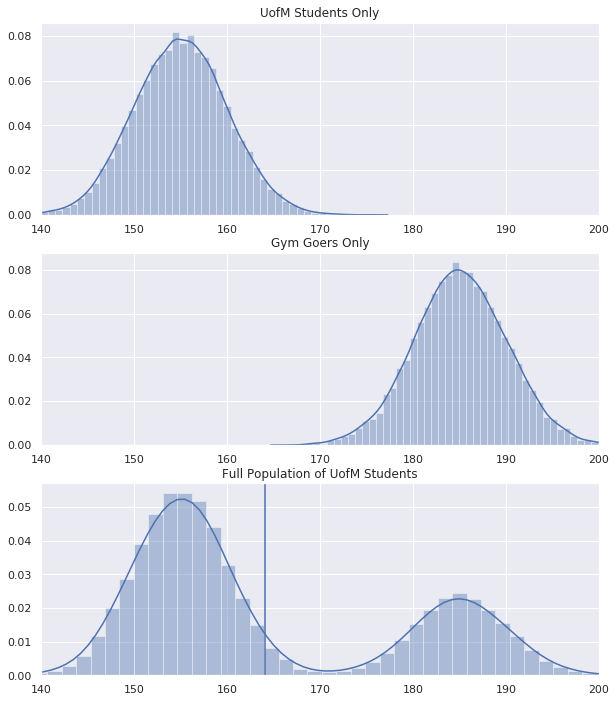

In [8]:
# Import the packages that we will be using for the tutorial
import numpy as np # for sampling for the distributions
import matplotlib.pyplot as plt # for basic plotting 
import seaborn as sns; sns.set() # for plotting of the histograms

# Recreate the simulations from the video 
mean_uofm = 155
sd_uofm = 5
mean_gym = 185 
sd_gym = 5 
gymperc = .3
totalPopSize = 40000

# Create the two subgroups
uofm_students = np.random.normal(mean_uofm, sd_uofm, int(totalPopSize * (1 - gymperc)))
students_at_gym = np.random.normal(mean_gym, sd_gym, int(totalPopSize * (gymperc)))

# Create the population from the subgroups
population = np.append(uofm_students, students_at_gym)

# Set up the figure for plotting
plt.figure(figsize=(10,12))

# Plot the UofM students only
plt.subplot(3,1,1)
sns.distplot(uofm_students)
plt.title("UofM Students Only")
plt.xlim([140,200])

# Plot the Gym Goers only
plt.subplot(3,1,2)
sns.distplot(students_at_gym)
plt.title("Gym Goers Only")
plt.xlim([140,200])

# Plot both groups together
plt.subplot(3,1,3)
sns.distplot(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

plt.show()

In [13]:
np.random.seed(123)
population = range(1, 101)
np.random.choice(population, 10)

array([67, 93, 99, 18, 84, 58, 87, 98, 97, 48])

In [19]:
nums = [random.uniform(1, 10) for i in range(1000)]

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


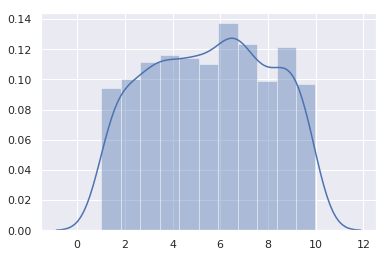

In [20]:
sns.distplot(nums)

### Lists vs Arrays

Doing arithmetic on the entire list / array.

In [3]:
my_list = [1, 2, 3]
my_array = np.array([1, 2, 3])

In [4]:
my_array / 3

array([0.33333333, 0.66666667, 1.        ])

In [5]:
my_list / 3

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [6]:
my_list.append(5) # inplace
my_list

[1, 2, 3, 5]

In [7]:
my_array = np.append(my_array, 5) # cannot do inplace because not always contiguous memory
my_array

array([1, 2, 3, 5])

### Confidence Intervals - one proportion

In [1]:
import numpy as np
62.5 - (1.96472941 * (10 / np.sqrt(500)))

61.62134629636939

Given a sample statistic, we want to construct a statement about the population statistic. Confidence interval is a range, which is our best estimate (sample statistic), plus minus the margin or error. So if we go out in the street and ask 100 people if they do yoga, and 8 of them say yes, we want to estimate what proportion of all inhabitants of this city do yoga.

To calulate the margin of error, we must decide what confidence interval we want to use:

Desired Confidence Interval - Z Score



90% - 1.645<br>
95% - 1.96<br>
99% - 2.576<br>

<img src="img/margin_of_error_calc.png" style="width: 450px;"/>




So the confidence interval has a lower and upper bound, and its center is the p-hat (sample mean). Depending on our chosen confidence, the range is wider or narrower. The range is bigger, if you need to be 99% confident that the population falls into it, and the range is stricter (narrower) if you need to be

90% = 0.023<br>
95% = 0.027<br>
99% = 0.036<br>

"With 90% confidence, the population mean is estimated to lie between 0.827	and 0.873"
<br><br>
"With 95% confidence, the population mean is estimated to lie between 0.823	and 0.877"
<br><br>
"With 99% confidence, the population mean is estimated to lie between 0.814	and 0.886"
<br><br>

The higher the confidence interval, the wider the range.<br><br>
You should have at least 10 yes and 10 no in your sample to meet the minimum requirements.

### Conservative Confidence Interval

The conservative approach, wants to maximize the standard error, in order to be on the safer side.<br> The concern here is: What if the p-hat (sample mean) is not accurate at all? <br>This is why the conservative approach discards it (it actually takes 0.5 as the value of p-hat), and only uses the sample size to calculate the margin of error to use for calulating the confidence interval.<br><br>

<img src="img/conservative_standard_error.png" style="width: 150px;"/>

#### Desired sample size
Given a scpefic, desired margin of error, say 3%, and confidence interval, say 95%, we can use the conservative approach to know how big our sample must be to produce this result: <br>

<img src="img/sample_size_for_desired_confidence.png" style="width: 250px;"/> 

### Confidence Intervals - two proportions
If we want to estimate what is the difference between two proportions (e.g. difference in proportion of white babies and black babies who can swim) we use the following formula, very similar to the formula for one proportion:
<img src="img/two_proportions_diff.png" style="width: 350px;"/>

The only difference is that you add the standard error of each sample, which makes sense.
So if you have two groups, Germans and French with a Masters degree:

p1 = 0.34<br>
n1 = 324

p2 = 0.46<br>
n2 = 111

0.34 - 0.42 = 0.08

And you want to conclude, if looking at all French people in the world, and all German people in the world, more French people have Masters degrees:

In [18]:
error_margin = 1.96 * np.sqrt((0.34 * (1 - 0.34) / 342)  +  (0.46 * (1 - 0.46) / 211))

In [19]:
(0.08 - error_margin, 0.08 + error_margin)

(-0.003923518298439996, 0.16392351829843999)

We estimate with 95% of confidence that the difference in proportions of between Germans and French with a masters degree is between -0.03% and 16%. Because 0 is included in this confidence interval, we cannot say that more French people have masters degrees.

### Confidence Intervals - mean

The standard error formula in the case of mean is different:

<img src="img/std of sample mean.png" style="width: 250px" align="center"/> 



When we deal with mean values, we no longer just multiply the standard error by 1.96, but we use the t multiplier, which depends on our sample size. The bigger the sample, the more robust our standard error, hence the lower t value.

First, we calculate the degrees of freedom, which is our sample size -1. So for a sample size of 25, the degrees of freedom is 24. 

Then we look at the T Distribution Table for the corresponding "a few" standard error value.

http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf

If your significance level is 0.05 for 95%, in the table you must look up the value for 0.025, as these are values considering only one tail of the distribution (so when you add it up for the plus and minus, you end up with 0.05).


Using Python to find the t-value for 95% confidence level:

from scipy.stats import t<br>
t.ppf(.975, df=4)<br>
2.7764451051977987<br>



You end up with a conclusion like: With 95% confidence, the population mean lies between 81.4 and 94.1.

### Confidence Interval - Mean difference for paired data

For example, if we compare the mean difference in education years for a younger and older sibiling.
We subtract their years of education and create the mean. Then, we proceed the exactly the same way as we would for one mean data.
After we construct the confidence intervals, we see if 0 is in the range of reasonable values.
If there is, we can't reject the null hypothesis that there is no difference.

### Confidence Interval - Two independent means

<img src="img/two_means_ste.png" style="width: 250px;"/> 

There are two approaches that can be used when having two means.

<b>1. Pooled Approach</b>

If the std of both samples is equal (or close enough).
<img src="img/pooled_formula.png" style="width: 450px;"/> 

<b>2. Unpooled Approach</b>

If the std of both samples is not equal:

<img src="img/unpooled.png" style="width: 250px;"/> 

The df for the t multiplier can be calculated using Welch's approximation, or, if technology is not available, take the smaller sample size out of the two, and subtract one. Then, once you have your df (degrees of freedom) you look up the multiplier value in a table.

### A-B testing

The average time per session is
20 seconds on the current LP, hence:
μ = 20
It's a population mean, as we have the whole historial data of every user and it's run for a long time.
Then, we create a new LP, and we test on on 100 people (hence it's a sample), and the avg time spent is 25 seconds.<br>
<br>
Null Hypothesis: The new LP performs same as the current one<br>
Alternative Hypothesis: The new LP performs better than the old one.

1. We set the significance level:<br>
α = 0.05 (5%)
<br>
2. We calculate the p-value.<br> It's the probability of getting a statistic at least this far from the mean (5 seconds off the mean), given that the null hypothesis is true.<br>
p(x̄ ≥ 25 minutes | H0 is True)
<br>
3. If my p-value < α, I reject the H0.
If my p-value >= α, I cannot reject the H0.
<br>
In simple words: The probability of Landing Page B performing better than Landing Page A by luck has to be lower than 5%.

### Hypothesis testing - one population proportion

1. You calculate your test statistic.
2. You calculate your p value.
3. You draw a conclusion out of your p value.

In the past year, 52% of parents said that smartphones are the cause of their teenagers' lack of sleep. Do more parents believe this now? The recent data is 56%.

Ho p = 0.52<br>
Ha p > 0.52<br>

0.56 - 0.52 / null hypothesis standard error

So those two groups differ by 0.04. Is it a lot or not? Could it be that those two groups don't actually differ, and that this difference is due to natural variability of data? This is why we want to see, how many standard errors of the null hypothesis it is away from.


<img src="img/test_statistic.png" style="width: 450px;"/> 
<img src="img/test statistic 2.png" style="width: 450px;"/> 

This Z test statistic means that our observed sample proportion is, 2.555 null standard errors above our hypothesized population proportion.

You get your p-value from the Z statistic using a Z-table (???)

If your p value is less than your alpha (0.05), you reject the null hypothesis.


### Hypothesis testing - two population proportion

Is there a significant difference in the population proportion of parents of Black and Hispanic children who've reported that their child has had some swimming lessons?
<img src="img/diff_two_prop.png" style="width: 150px;"/> 
<img src="img/se_two_prop.png" style="width: 250px;"/> 

Where our p is the sum of all "yes's" divided by number of all participants of the study. And again, you get the Z value and from this, you calculate the p value and see if it's smaller than 0.05.

### Hypothesis testing - one mean

Given a sample mean, we want to see if the population mean is the same (average example cartweheel distance).
Research question:
Is the average cartwheel distance for all population adults, more than 80?

Ho = It is 80.

Ha = It is > 80.

You gather your sample and the sample mean is 82.48. But is it enough to reject the Ho?

<img src="img/one_mean_hypothesis.png" style="width: 300px;"/> 
<img src="img/p_value.png" style="width: 500px;"/> 

The p value calculated from the t value of 0.82 is 0.21. It means that we can expect to see a mean of 82.48 20% of the time assuming the null hypothesis (the population mean is 80) is true. It is not so unusual. The p value is not smaller than our alpha (0.05), so we fail to  reject the null.


#### We can answer the same question using confidence intervals!

<img src="img/hypothesis_confidence.png" style="width: 500px;"/> 

Because the mean of 80 is included in the interval, we fail to reject the null.


### Difference in means for paired data

Example: Difference in prices for 20 basic furniture pieces between Ikea and Obi.
Procedure: You calculate the difference and proceed using the same formulas as in hypothesis for one mean, only you calculate the std for all the differences, and the mean of all the differences.

<img src="img/hypothesis_paired_data.png" style="width: 170px;"/> 


### Difference in means for independent data

<img src="img/pooled_def.png" style="width: 370px;"/> 
<img src="img/pooled_formula_hypothesis.png" style="width: 370px;"/> 

/////////////////
<img src="img/unpooled_def.png" style="width: 370px;"/> 
<img src="img/pooled_formula_hypothesis.png" style="width: 370px;"/> 